# Data Analysis
# Introduction to Exploratory Data Analysis

In this notebook, we cover: 
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- simple plotting functions 
- correlation vs causation

## Variable types

- **quantitative variables**: values are real numbers (e.g., length, age)
- **categorical (or qualitative) variables**: values are discrete (e.g., year born, T/F)

Quantitative variables can be either discrete (e.g. number of cars) or continuous (e.g. temperature).

Categorical variables might or might not have an order associated with the categories.

## Quantitative Variables: Descriptive Statistics

The goal is to describe a dataset with a small number of statistics or figures  

Suppose we are given a sample, $x_1, x_2, \ldots, x_n$, of real values 

Some *descriptive statistics* for this data are the min, max, median, and mean, $\frac{1}{n} \sum_{i=1}^n x_i$

**Goal**: Use python to compute descriptive statistics. We'll use the python package [numpy](http://www.numpy.org/) for now. 

In [1]:
# First import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# graphs are included in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Alta monthly average snowfall, October - April

Let's compute descriptive statistics for the monthly average snowfall at Alta. 

The snowfall data was collected from 1980 to 2014 and is available [here](https://www.alta.com/conditions/weather-observations/snowfall-history).

In [2]:
Alta_avg_month_snow = [28.50,76.77,92.00,95.40,90.85,99.66,80.00]
months = ['Oct','Nov','Dec','Jan','Feb','March','Apr']

# Alta_avg_month_snow is a list of floats
print(type(Alta_avg_month_snow))
print(type(Alta_avg_month_snow[0]))

# months is a list of strings
print(type(months))
print(type(months[0]))

<class 'list'>
<class 'float'>
<class 'list'>
<class 'str'>


In [3]:
# how many months of data do we have?
len(Alta_avg_month_snow)

7

In [4]:
# compute the min and max snowfall
print(np.min(Alta_avg_month_snow))
print(np.max(Alta_avg_month_snow))

28.5
99.66


In [5]:
# what month do these correspond to? 
imin = np.argmin(Alta_avg_month_snow)
print(months[imin])
print(Alta_avg_month_snow[imin])

imax = np.argmax(Alta_avg_month_snow)
print(months[imax])
print(Alta_avg_month_snow[imax])


Oct
28.5
March
99.66


Mean, $\mu = \frac{1}{n} \sum_{i = 1}^n x_i$ <br>

In [6]:
# compute the mean
mean_snow = np.mean(Alta_avg_month_snow)
print(mean_snow)

80.4542857142857


Median: The center of the  data values 

Half of the data values are to the left of the median and half are to the right of the median.
For symmetric distributions, the median is directly in the middle

In [7]:
# compute the median
median_snow = np.median(Alta_avg_month_snow)
print(median_snow)

90.85


## Plotting the data

We can use the python library [matplotlib](https://matplotlib.org/) to make a simple plot of the average monthly snowfall.



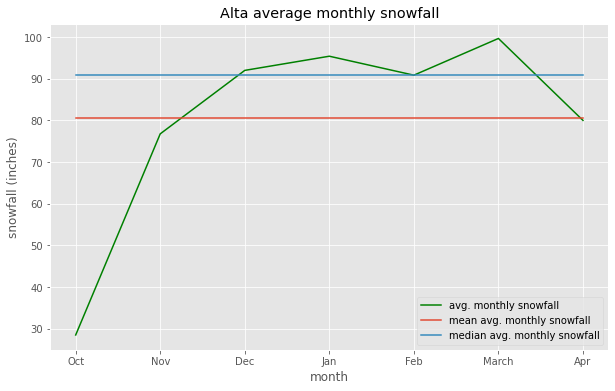

In [8]:
plt.plot(Alta_avg_month_snow, label="avg. monthly snowfall", color="g")
plt.xticks(np.arange(7),months)
plt.plot([0,6],[mean_snow,mean_snow], label="mean avg. monthly snowfall")
plt.plot([0,6],[median_snow,median_snow], label="median avg. monthly snowfall")
plt.title("Alta average monthly snowfall")
plt.xlabel("month")
plt.ylabel("snowfall (inches)")
plt.legend(loc='lower right')
plt.show()

## Population data from the 1994 census

Let's compute some descriptive statistics for age in the 1994 census. We'll use the 'Census Income' dataset available [here](https://archive.ics.uci.edu/ml/datasets/Adult).

In [9]:
# use pandas to import a table of data from a website
data = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=",", 
                  names=("age", "type_employer", "fnlwgt", "education", "education_num", "marital", 
                         "occupation", "relationship", "race","sex","capital_gain", "capital_loss", 
                         "hr_per_week","country", "income"))
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [10]:
print(data)

       age      type_employer  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

                   marital          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [11]:
# export a list containing ages of people in 1994 Census
ages = data["age"].tolist()
print(ages[1:10])

[50, 38, 53, 28, 37, 49, 52, 31, 42]


In [12]:
# now use numpy to compute descriptive statistics for ages
print(len(ages))
print(np.min(ages))
print(np.max(ages))
print(np.mean(ages))
print(np.median(ages))

32561
17
90
38.58164675532078
37.0


## Histograms

We can also make a histogram using the python library [matplotlib](https://matplotlib.org/) to show the distribution of ages in the dataset. 

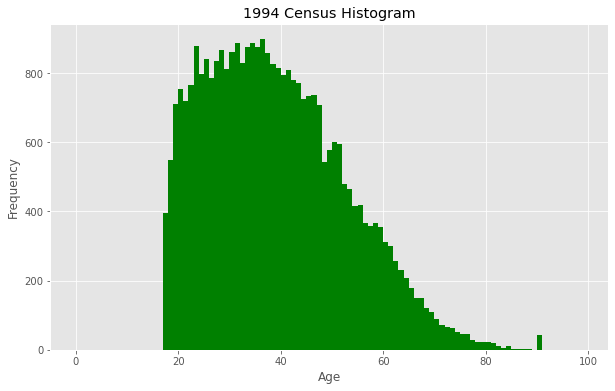

In [13]:
plt.hist(ages,np.arange(0,100), color="g")
plt.title("1994 Census Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Different bins tell different stories

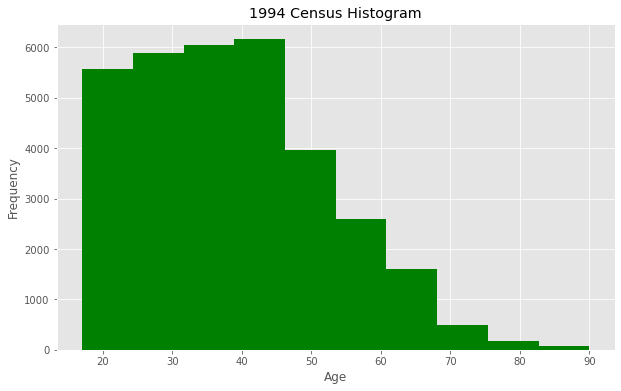

In [14]:
plt.hist(ages,color="g")
plt.title("1994 Census Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## What do we look for in a histogram?

* Distribution (Uniform, Skewed Right / Skewed Left / Symmetrical)

<img src="histograms.png" width="50%">

* Mode: A hump or a high-frequency bin (unimodal, bimodal, multimodal)

$mean-mode = 3*(mean-median)$

<img src="modes.png" width="50%">



## Intuition of mean/median/mode

<img src="intuition.png" width="50%">




## More numbers 

Quantiles describe what percentage of the observations in a sample have smaller value


In [15]:
print(np.percentile(ages,25))
print(np.percentile(ages,75))

28.0
48.0


For this data, 25% of the people are under 28 years old

The middle 50% of the data (the data between the 25% and 75% quantiles) is between 28 and 48 years old 

# Range, Variance and Standard Deviation

Range, variance and standard deviation quantify the amount of variation or dispersion of a set of data values.

$Range = Maximum - Minimum$ <br>
Mean, $\mu = \frac{1}{n} \sum_{i = 1}^n x_i$ <br>
Variance $= \sigma^2   = \frac{1}{n} \sum_{i = 1}^n (x_i - \mu)^2$ <br>
Std. dev. $= \sigma$

Range is sensitive to outliers. A single high or low value will affect the range significantly

In [16]:
print(np.max(ages)-np.min(ages))
print(np.var(ages))
print(np.std(ages))

73
186.05568600783081
13.640223092304275


Quiz (www.wooclap.com/UMDA): Order the histograms below from smallest standard deviation to largest standard deviation.

    A:A,B,C
    B:B,A,C
    C:C,A,B
    D:A,C,B
    E:B,C,A

<img src="stdhist.png" width="50%">



In terms of the histogram,...
<img src="SmallLargeStandDev.png" width="50%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">



## Outlier detection

An outlier is a data value that is far above or far below the rest of the data values.

An outlier is sometimes just an error in the data collection. An outlier can also be the most important data value.

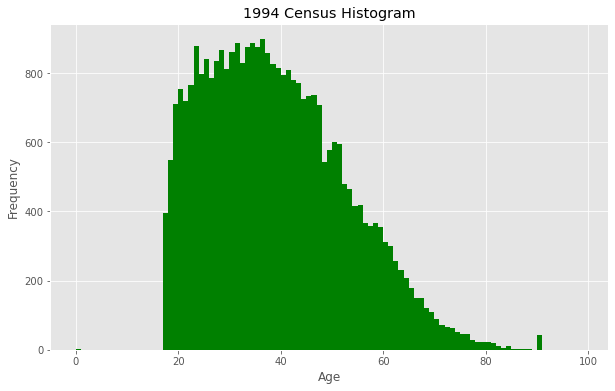

In [17]:
#We can also use histograms for outlier detection
ages2 = ages
ages2[100]=0

plt.hist(ages2,np.arange(0,100), color="g")
plt.title("1994 Census Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Boxplots

* A Boxplot is a chart that displays the 5-Point Summary and the outliers
* The 5-Point summary provides a numerical description of the data: minimum, Q1, Median, Q3, maximum

<img src="boxplot.png" width="40%">

* The box shows the Interquartile Range ($IQR=Q3-Q1$).
* The line inside the box shows the median.

* The dashed lines are called fences, outside the fences lie the outliers.
* Above and below the box are the whiskers that display the most extreme data values within the fences.
* Lower Fence = $Q1 - 1.5*IQR$, Upper Fence = $Q3+1.5*IQR$

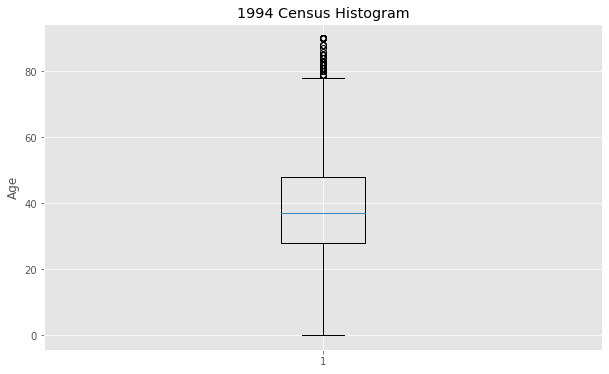

In [18]:
#ages = data["age"].tolist()
plt.boxplot(ages2)
plt.title("1994 Census Histogram")
plt.ylabel("Age")
plt.show()

# Categorical Variables: 

We can do frequency tables, relative frequency tables, bar charts and pie charts

In [19]:
#a bit of a cheat since i am using the series object of pandas
race = data["race"]
print(race)

0         White
1         White
2         White
3         Black
4         Black
          ...  
32556     White
32557     White
32558     White
32559     White
32560     White
Name: race, Length: 32561, dtype: object


In [20]:
print(race.value_counts()) #frequency table
print(race.value_counts()/len(race)) #relative frequency table

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64
 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64


<AxesSubplot:>

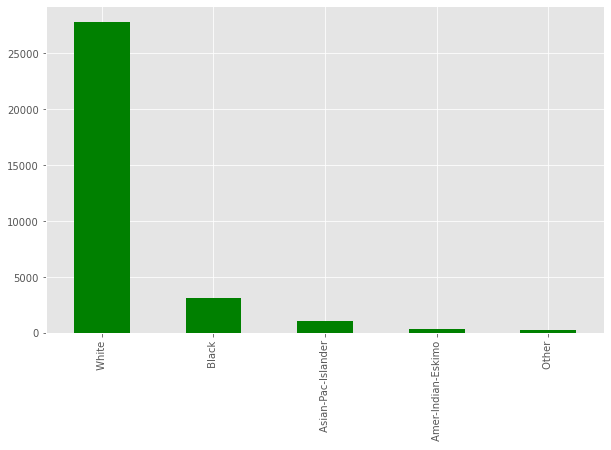

In [21]:
#a basic bar-chart
df=race.value_counts()
df.plot.bar(color="g")

<AxesSubplot:ylabel='race'>

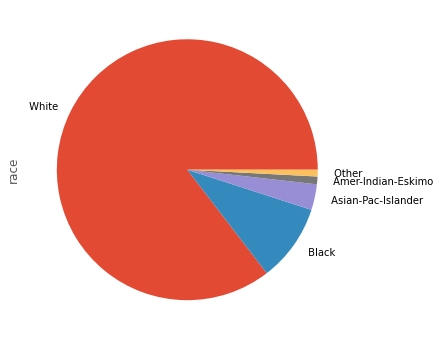

In [22]:
df.plot.pie()

# What can go wrong (and will)

* Don't make a histogram for categorical data!

<img src="dontdoit.png" width="30%">



* Don’t look for shape, center and spread in a bar chart
* Choose a histogram bin width appropriate for the data
* Do a reality check (don’t blindly trust calculators or your computer
** A mean student age of 193 years old is nonsense.
** A (human) heart pulse cannot be 800 bpm
* Beware of outliers, the mean and standard deviation are sensitive to outliers.
* Use a histogram to ensure that the mean and standard deviation really do describe the data.
* Don’t compute numerical summaries for a categorical variable (e.g. the mean Social Security number is meaningless)
* Don't do line plots when not appropriate

<img src="dontdoit2.png" width="30%">


## Associating variables

Scatterplots exhibit the relationship between two variables.
Used for detecting patterns, trends, relationships and extraordinary values

<img src="grapefruit.png" width="50%"  alt="https://xkcd.com/388/"/>




In 1994 consensus data, let's check age and hr_per_week. Is this useful? This is an example of overplotting.

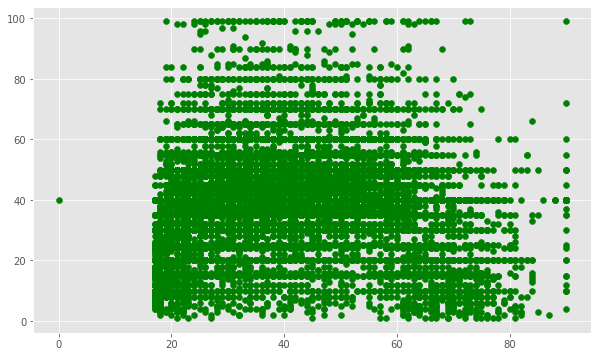

In [23]:
#ages (i already have it)
hr = data["hr_per_week"].tolist()

plt.scatter(ages2, hr, c="g",label="Age vs. Hours per week")

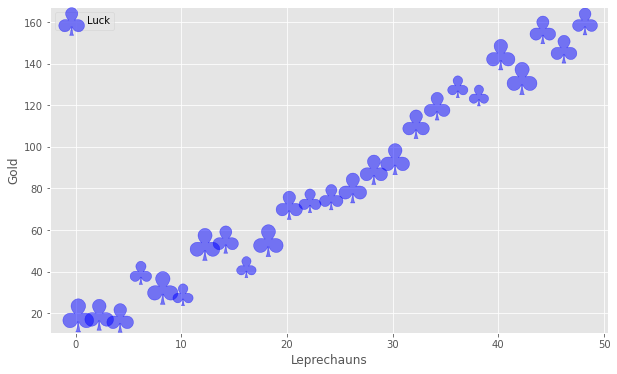

In [24]:
#Another example from https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="b", alpha=0.5, marker=r'$\clubsuit$',label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc='upper left')
plt.show()

## Covariance and Correlation
Covariance and correlation measure of how much two variables change together.

The *covariance* of two variables $x$ and $y$ is given by
$$
cov(x,y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y),
$$ 
where
+ $\mu_x$ is mean of $x_1,x_2,\ldots,x_n$ and
+ $\mu_y$ is mean of $y_1,y_2,\ldots,y_n$.

The *correlation coefficient* of two variables $x$ and $y$ is given by 
$$
corr(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y},
$$
where
+ $\sigma_x$ is std. dev. of $x_1,x_2,\ldots,x_n$ and 
+ $\sigma_y$ is std. dev. of $y_1,y_2,\ldots,y_n$.

<br> <br> 
Here is a plot of several pairs of variables, together with the correlation coefficient:
<img src="Correlation_examples2.svg" width="90%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">

* Negative (positive) direction: As one goes up, the other goes down (up)
* No direction means no relationship
* Clear line means a clearly linear relationship
* Dense line means a strong linear relationship
* Extreme values (outliers) can also be found here!

Test your data science intuition/knowledge here: http://guessthecorrelation.com/


In [25]:
np.corrcoef(ages,hr)

array([[1.        , 0.06876127],
       [0.06876127, 1.        ]])

In [26]:
np.corrcoef(x,y)

array([[1.        , 0.98549275],
       [0.98549275, 1.        ]])

## Assumptions, Conditions, Properties of Correlation

* To use $corr$, there must be a true underlying linear relationship between the two variables.  
* The variables must be quantitative.  
* Outliers can strongly affect the correlation. Look at the scatterplot to make sure that there are no strong outliers. 
* $corr > 0$ --> positive association, $corr < 0$ --> negative association
* $−1 <= corr <= 1$
* Interchanging x and y does not change the correlation.
* $corr$  has no units.
* Changing the units of x or y does not affect $corr$

## Avoid 3D!

<img src="dontdoit3.png" width="70%">


Color-coding (when you want to add a categorical variable) or (light)3D (when you want to add a third quantitative variable) might work

<img src="scattercat.png" width="50%">
<img src="scatterlight.png" width="50%">




If you want to compare variables, scatterplot is not the only option. Consider multiple histograms or boxplots for quantitative variables

<img src="multiplehist.png" width="70%">
<img src="multiplebox.png" width="70%">



If you have time (continuous or discrete) consider stacked graphs 

<img src="stacked1.png" width="70%">
<img src="stacked2.png" width="70%">


## Don't! Correlation vs Causation

<img src="correlation.png" width="100%"  alt="https://xkcd.com/552/">




## Spurious Correlations I (www.tylervigen.com)

<img src="Conf1.png" width="100%"  alt="www.tylervigen.com">



## Spurious Correlations II (www.tylervigen.com)

<img src="Conf2.png" width="100%" alt="www.tylervigen.com">


# Concept recap
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 

## Next up: Visualizations
## Next week we will start looking at inferential statistics (starting with Hypothesis testing)